<a href="https://colab.research.google.com/github/hafizhfadhullah/Python/blob/main/MYC/CDD_ML_Part_5_MYC_Compare_Regressors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**



## **1. Import libraries**

In [1]:
! pip install lazypredict

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## **2. Load the data set**


In [3]:
! wget https://github.com/hafizhfadhullah/Data/raw/main/MYC_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2025-01-29 09:55:41--  https://github.com/hafizhfadhullah/Data/raw/main/MYC_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hafizhfadhullah/Data/main/MYC_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2025-01-29 09:55:41--  https://raw.githubusercontent.com/hafizhfadhullah/Data/main/MYC_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1607935 (1.5M) [text/plain]
Saving to: ‘MYC_06_bioactivity_data_3class_pIC50_pubchem_fp.csv’

MYC_06_bioactivity_ 100%[===================>]   1.53M  --.

In [5]:
df = pd.read_csv('MYC_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [6]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [7]:
# Examine X dimension
X.shape

(899, 881)

In [8]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP34,PubchemFP150,PubchemFP152,PubchemFP153,PubchemFP157,PubchemFP160,...,PubchemFP737,PubchemFP758,PubchemFP767,PubchemFP776,PubchemFP778,PubchemFP779,PubchemFP799,PubchemFP800,PubchemFP821,PubchemFP830
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,1,1,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
895,1,1,0,0,0,1,1,1,0,0,...,1,1,0,1,0,0,0,1,1,0
896,1,1,0,0,0,1,1,1,1,1,...,1,1,0,1,0,0,0,1,1,0
897,1,1,0,0,0,1,1,1,0,0,...,1,1,0,1,0,0,0,1,1,0


In [ ]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(4695, 137)

In [9]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [10]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:20<00:00,  2.02it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 486
[LightGBM] [Info] Number of data points in the train set: 719, number of used features: 162
[LightGBM] [Info] Start training from score 5.755336
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

100%|██████████| 42/42 [00:19<00:00,  2.15it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 486
[LightGBM] [Info] Number of data points in the train set: 719, number of used features: 162
[LightGBM] [Info] Start training from score 5.755336
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [11]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.91,0.93,0.25,1.72
DecisionTreeRegressor,0.91,0.93,0.25,0.09
ExtraTreeRegressor,0.91,0.93,0.25,0.06
GaussianProcessRegressor,0.91,0.93,0.25,0.38
RandomForestRegressor,0.86,0.89,0.30,1.46
BaggingRegressor,0.85,0.88,0.32,0.13
MLPRegressor,0.82,0.86,0.34,1.56
HistGradientBoostingRegressor,0.79,0.84,0.37,0.56
LGBMRegressor,0.75,0.80,0.41,0.20


In [12]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
BayesianRidge,-2.91,0.63,0.62,0.18
PoissonRegressor,-2.93,0.63,0.62,0.04
ElasticNetCV,-2.94,0.63,0.62,4.50
SVR,-2.99,0.62,0.63,0.12
NuSVR,-3.00,0.62,0.63,0.13
LassoCV,-3.01,0.62,0.63,4.18
RidgeCV,-3.04,0.62,0.63,0.08
HuberRegressor,-3.32,0.59,0.65,0.12
GradientBoostingRegressor,-3.32,0.59,0.65,0.40


## **5. Data visualization of model performance**

[(0.0, 1.0)]

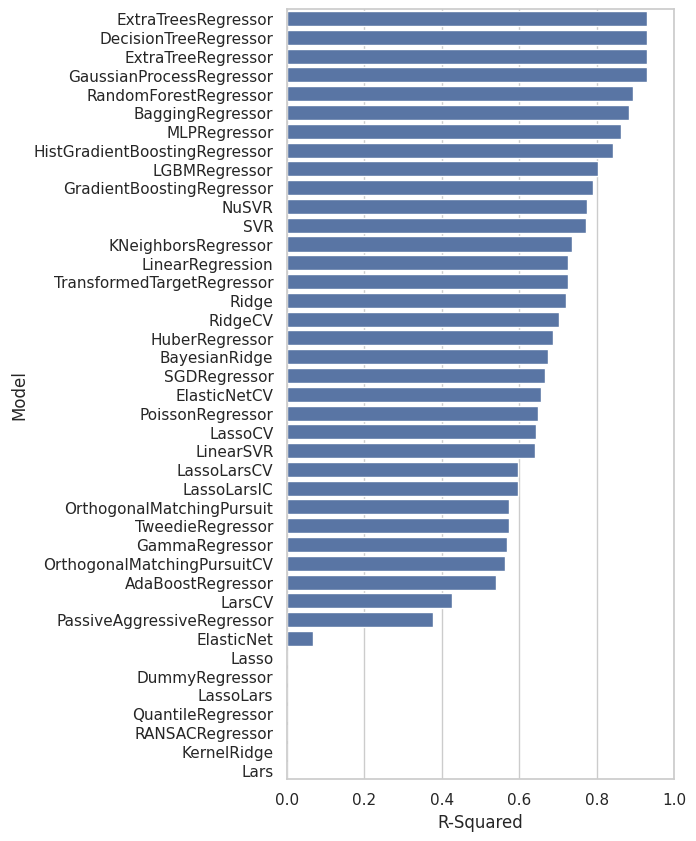

In [13]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

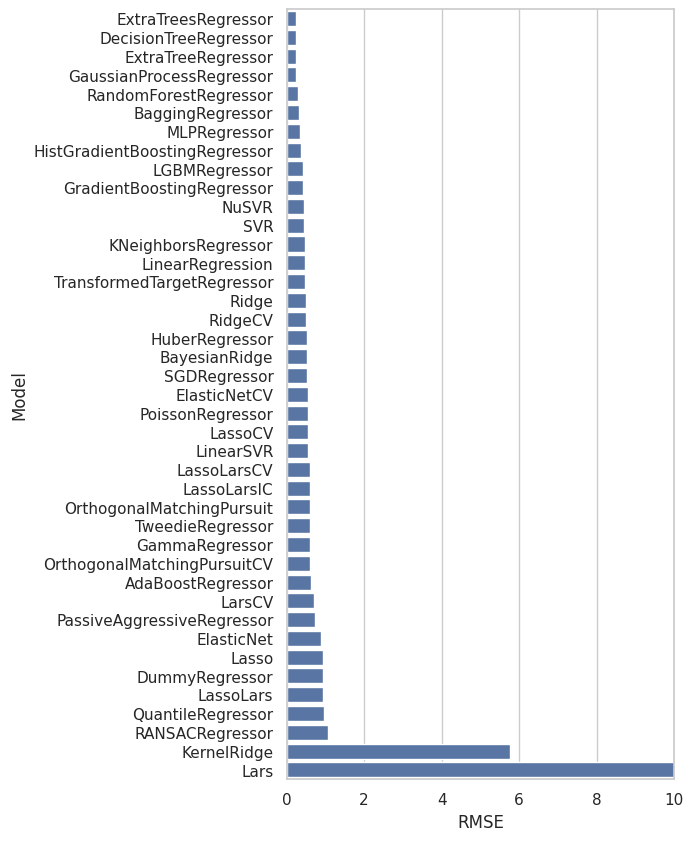

In [14]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

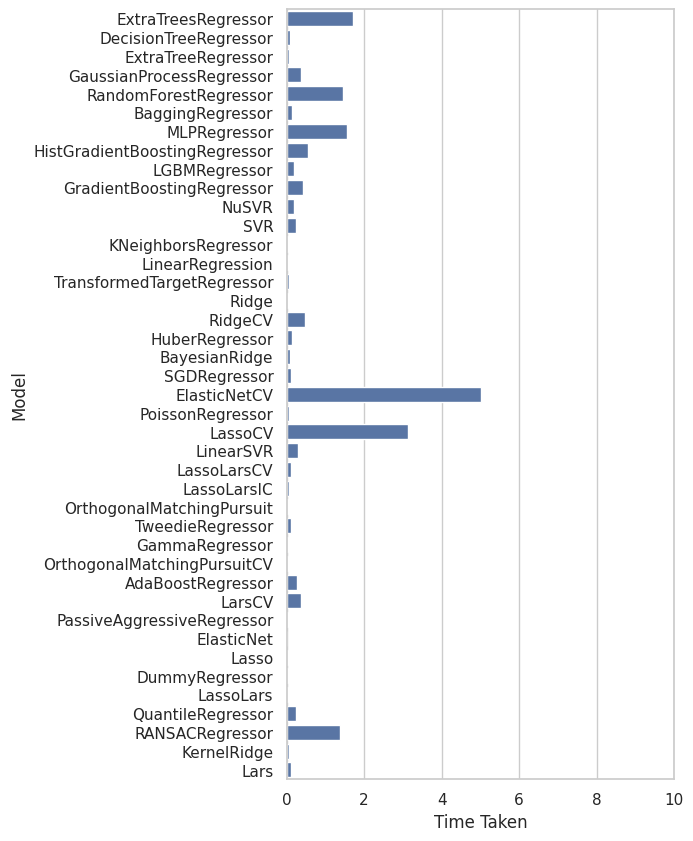

In [15]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))